# PROGRAMACIÓN SIMBOLICA
Instalar `pip install sympy`

In [1]:
x = 5
x

5

In [2]:
x = x + 1
x

6

In [3]:
import sympy as sp
import numpy as np

In [4]:
# declarar con la funcion symbols
x, y, h, b = sp.symbols('x y h b')

In [5]:
x

x

In [6]:
y

y

In [7]:
# raiz cuadrada
sp.sqrt(5) + sp.sqrt(13)

sqrt(5) + sqrt(13)

In [8]:
np.sqrt(5)

2.23606797749979

In [9]:
5 / 2

2.5

In [10]:
expr = b * h * 5 + x ** 2 
expr

5*b*h + x**2

In [11]:
area_triangulo =  sp.Rational(1, 2) * expr
area_triangulo

5*b*h/2 + x**2/2

In [12]:
area_triangulo.subs(b, 9)

45*h/2 + x**2/2

In [13]:
area_triangulo.subs([(b, 9), (h, 3)])

x**2/2 + 135/2

In [14]:
# reemplazar valores en simbolos mediante la funcion subs
area_triangulo.subs(b, h + x ** 2 / 3)

5*h*(h + x**2/3)/2 + x**2/2

In [15]:
# simbolos default
from sympy.abc import p, q, xi, b, h, x

In [16]:
b

b

In [17]:
expresion = 18 * x ** 2 + 81 * x
expresion

18*x**2 + 81*x

In [18]:
expresion_2 = sp.factor(expresion)
expresion_2

9*x*(2*x + 9)

In [19]:
ex_2 = sp.expand(expresion_2)

In [20]:
ex = sp.factor((x**3 + x**2 - x - 1))/(x**2 + 2*x + 1)
ex

(x - 1)*(x + 1)**2/(x**2 + 2*x + 1)

In [21]:
# si quiero simplificar de la forma mas optima uso simplify
sp.simplify(ex)

x - 1

# Resolver ecuaciones
1. Necesito usar la funcion `Eq`
2. Usar la funcion `solve`

In [22]:
ex_2
# 18𝑥2+81𝑥 =  0

18*x**2 + 81*x

In [23]:
ecuacion = sp.Eq(ex_2, 0)
ecuacion

Eq(18*x**2 + 81*x, 0)

In [24]:
sp.solve(ecuacion)

[-9/2, 0]

# Matrices
Utilizar la funcion `Matrix`

In [25]:
A_simbolica = sp.Matrix([
    [1, 2],
    [2, -3]
])
A_simbolica

Matrix([
[1,  2],
[2, -3]])

In [26]:
b = sp.Matrix([1, 2])
b

Matrix([
[1],
[2]])

In [27]:
# sympy me da una funcion LUsolve
A_simbolica.LUsolve(b)

Matrix([
[1],
[0]])

In [28]:
A = np.array([
    [1, 2],
    [2, -3]
])
b = np.array([1, 2])
np.linalg.solve(A, b)

array([1., 0.])

# FUNCIONES

In [29]:
import matplotlib.pyplot as plt

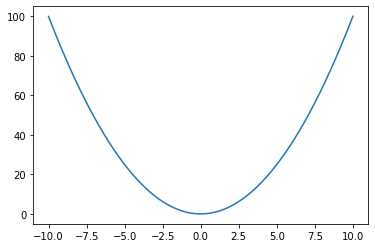

In [30]:
x = np.arange(-10, 10.005, 0.005)
y = x ** 2
plt.plot(x, y)

In [31]:
y = x ** 2
y

array([100.      ,  99.900025,  99.8001  , ...,  99.900025, 100.      ,
       100.100025])

In [32]:
from sympy.plotting import plot3d
# f(x, y) = x * y
plot3d(x * y + x ** 2 * y)

TypeError: 'NoneType' object is not iterable

# DERIVADAS
Debo usar la función `diff`

In [ ]:
ex_2

In [ ]:
ex_3 = sp.diff(ex_2)
sp.diff(ex_3)

In [ ]:
sp.diff(ex_2, x, 2)

In [ ]:
ex_3 = x * y + x ** 2 * y
ex_3

In [ ]:
sp.diff(ex_3, x)

# INTEGRALES
Debo usar la función `integrate`

In [ ]:
sp.integrate(ex_2)

In [ ]:
sp.integrate((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

In [ ]:
ex_3

In [ ]:
sp.integrate(ex_3, y, y, x)

In [ ]:
sp.integrate(ex_2, (x, 0, 1))

In [ ]:
integral = sp.Integral(ex_2, (x, 0, 1))
integral

In [ ]:
integral.doit()

In [ ]:
sp.integrate(x ** x, x)

# Diagramas de fuerzas internas

In [35]:
# en metros
LONGITUD = 4
# en kN
CARGA_P = 100

In [ ]:
sp.plot((CARGA_P / 2, (x, 0, LONGITUD / 2)), (-CARGA_P / 2, (x, LONGITUD / 2, LONGITUD)))

In [ ]:
tramo_1 = CARGA_P * x / 2
tramo_1

In [ ]:
tramo_2 = CARGA_P / 2 * (LONGITUD - x)
tramo_2

In [ ]:
sp.plot((tramo_1, (x, 0, LONGITUD / 2)), (tramo_2, (x, LONGITUD / 2, LONGITUD)))

# Resolver vigas con Sympy

In [33]:
from sympy.physics.continuum_mechanics.beam import Beam

In [36]:
E, I = sp.symbols('E I')
viga = Beam(LONGITUD, E, I)

# como aplico cargas, solicitaciones?
# viga.apply_load(magnitud, ubicacion, tipo_solicitacion)
viga.apply_load(CARGA_P, LONGITUD / 2, -1)
# aplicar las reacciones
R1, R2 = sp.symbols('R1 R2')
viga.apply_load(R1, 0, -1)
viga.apply_load(R2, LONGITUD, -1)
# declarar que en A y B no hay deflexion, bc_deflection
viga.bc_deflection = [(0, 0), (LONGITUD, 0)]
# resolver sistema pasandole las reacciones
viga.solve_for_reaction_loads(R1, R2)

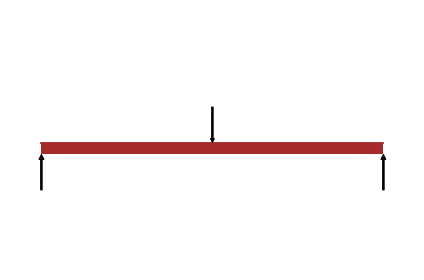

In [37]:
dibujo = viga.draw()
dibujo.show()

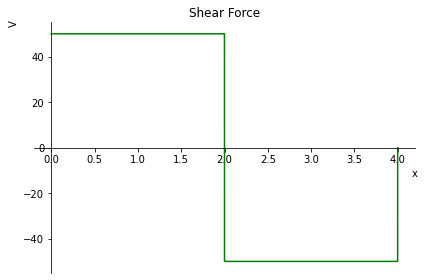

In [38]:
# plot_shear_force para dibujar el diagrama cortate
viga.plot_shear_force()

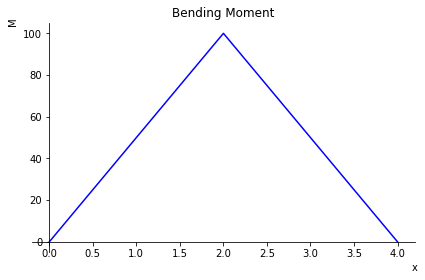

In [39]:
# graficar diagrama de momento
viga.plot_bending_moment()

In [ ]:
viga.max_bmoment()

In [41]:
viga.bending_moment()

50.0*SingularityFunction(x, 0, 1) - 100*SingularityFunction(x, 2.0, 1) + 50.0*SingularityFunction(x, 4, 1)

In [43]:
viga.shear_force()

50.0*SingularityFunction(x, 0, 0) - 100*SingularityFunction(x, 2.0, 0) + 50.0*SingularityFunction(x, 4, 0)

In [49]:
hola = 'Hola Mundo'
hola[::-1]

'odnuM aloH'

In [62]:
longitud = len(hola)
longitud
posiciones

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [71]:
#1. Obtengo mi lista de posiciones
posiciones = list(range(0, longitud))
# 2. Invierto esas posiciones
posiciones.reverse()

resultado = ''
for posicion in posiciones:
    #3. accedo a cada posicion y voy sumando esos pequeños caracteres
    resultado = resultado + hola[posicion]

resultado

'odnuM aloH'

In [67]:
posiciones.reverse()
pos

NameError: name 'pos' is not defined

In [72]:
'' + 'o' + 'd'

'od'

In [75]:
list(range(longitud - 1, -1 , -1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]